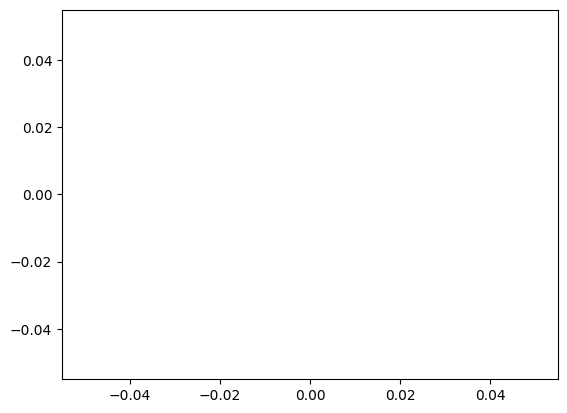

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import Welfare, get_random_prob


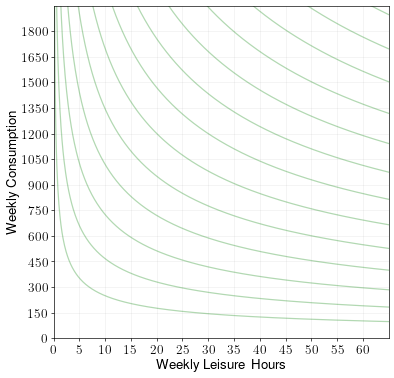

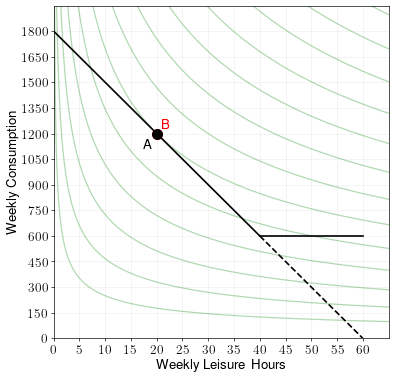

True

In [2]:
prob = Welfare()
prob.graph_with_IC(show=True, with_solution=False)
prob.graph_with_IC(show=True, with_solution=True)

In [3]:
df = pd.read_csv("LeisureCB_examples.csv")
examples = []
n_found = 0
for idx, row in df.iterrows():
    params = dict(row).copy()
    cmax = params['cmax']
    for minc in np.arange(cmax/12, cmax-cmax/12, cmax/12):
        params['minc'] = minc
        prob = Welfare(params)
        if prob.check_solution():
            n_found+=1
            examples.append(prob.params | prob.sol)
            if (n_found%1000==0):
                print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("Welfare_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

1000 examples found...
1980 examples found.


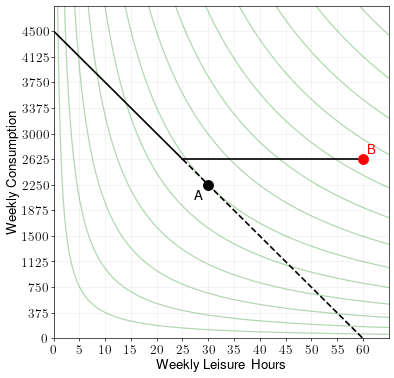

True

In [19]:
prob = get_random_prob(Welfare, "Welfare_examples.csv")
prob.graph_with_IC(show=True, with_solution=True)

In [5]:
(examples['h']>0).value_counts()

False    1493
True      487
Name: h, dtype: int64

In [6]:
(examples['c_no_welfare'] > examples['c']).value_counts()

False    1585
True      395
dtype: int64